In [3]:
import pandas as pd

# Load both files
df_csv = pd.read_csv('../data/raw/data.csv')
df_xlsx = pd.read_excel('../data/raw/data.xlsx')  
print("CSV shape:", df_csv.shape)
print("Excel shape:", df_xlsx.shape)

CSV shape: (95662, 16)
Excel shape: (95662, 18)


In [5]:
csv_cols = pd.read_csv('../data/raw/data.csv', nrows=0).columns
excel_cols = pd.read_excel('../data/raw/data.xlsx', nrows=0).columns

print("Columns only in Excel:", set(excel_cols) - set(csv_cols))

Columns only in Excel: set()


In [6]:
print("CSV columns:", list(csv_cols))
print("Excel columns:", list(excel_cols))

CSV columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
Excel columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']


## 1. Overview of the Data

In this step, we will:
- Load the dataset from the CSV file.
- Display the first few rows to get an initial sense of the data.
- Check the shape (number of rows and columns) of the dataset.

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/raw/data.csv')

# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Display the first 5 rows
df.head()

Dataset shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 2. Data Types and Basic Info

In this step, we will:
- Use `.info()` to inspect the data types and non-null counts for each column.
- Identify which features are categorical and which are numerical.

In [8]:
# Display data types and non-null counts
df.info()

# List all columns
print("Columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## 3. Summary Statistics

In this step, we will:
- Generate summary statistics for numerical features to understand their central tendency, dispersion, and distribution shape.
- Generate summary statistics for categorical features to understand their frequency and variability.

In [10]:
# Summary statistics for numerical features
print("Numerical Features:")
df.describe()

# Summary statistics for categorical features
print("\nCategorical Features:")
df.describe(include='object')

Numerical Features:

Categorical Features:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


## 4. Distribution of Numerical Features

In this step, we will:
- Visualize the distribution of numerical features using histograms.
- Identify patterns, skewness, and potential outliers in the data.

Distribution of Numerical Features explained using histograms:


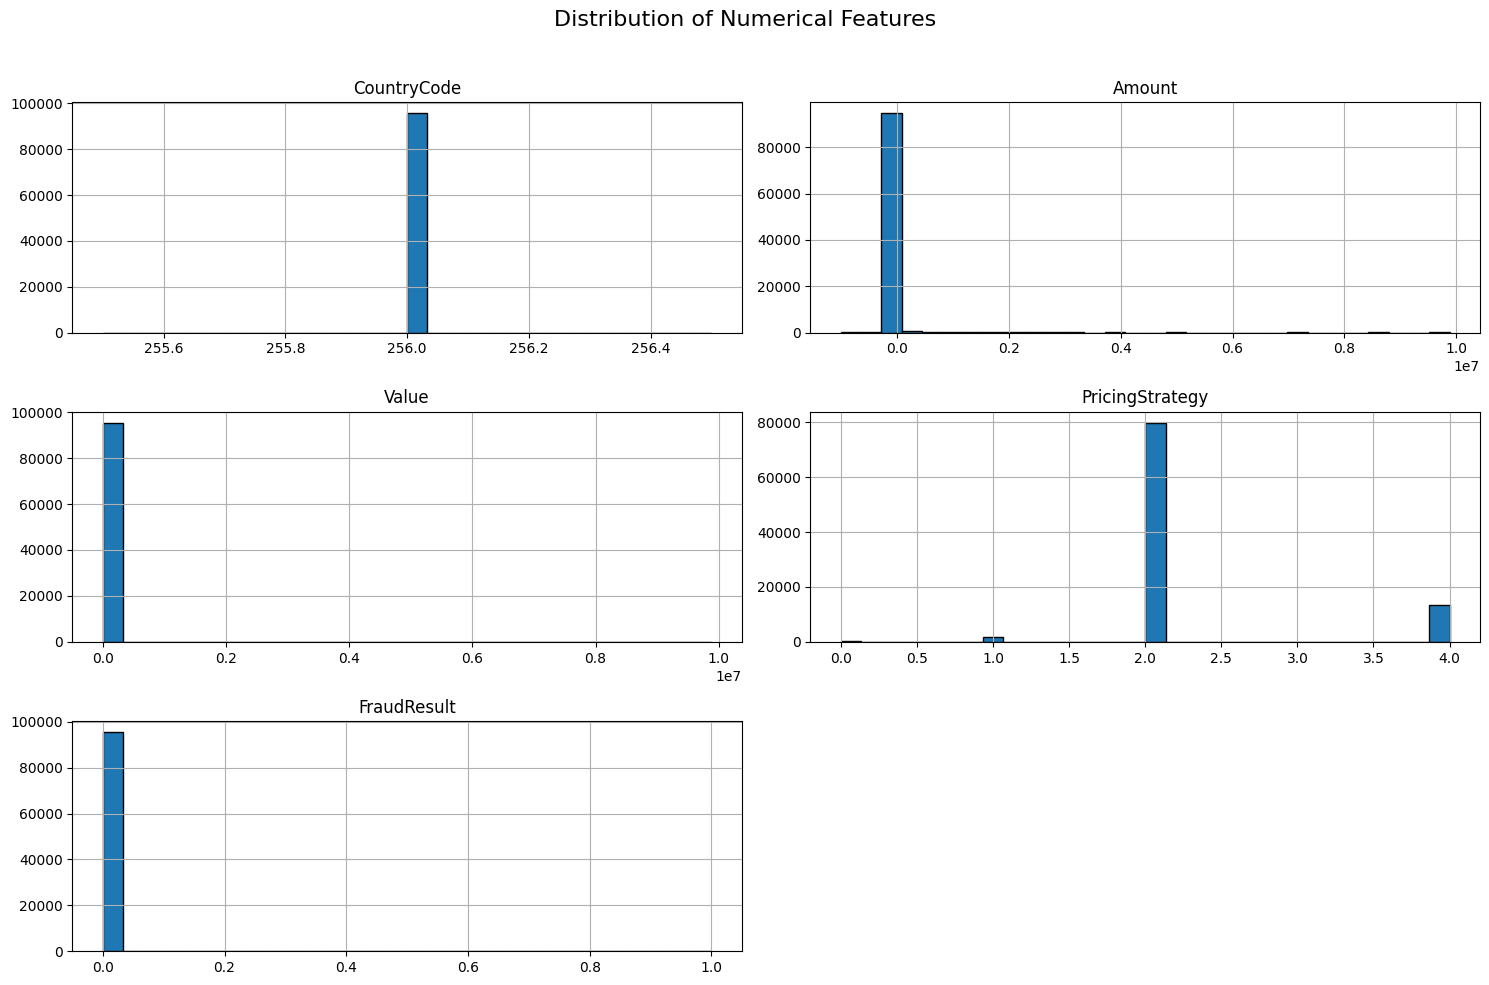

In [11]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Plot histograms for each numerical feature
print("Distribution of Numerical Features explained using histograms:")
df[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 5. Distribution of Categorical Features

In this step, we will:
- Analyze the distribution of categorical features.
- Visualize the frequency of the top categories for each categorical column using bar plots.

Distribution of Categorical Features explained using bar plots:


/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


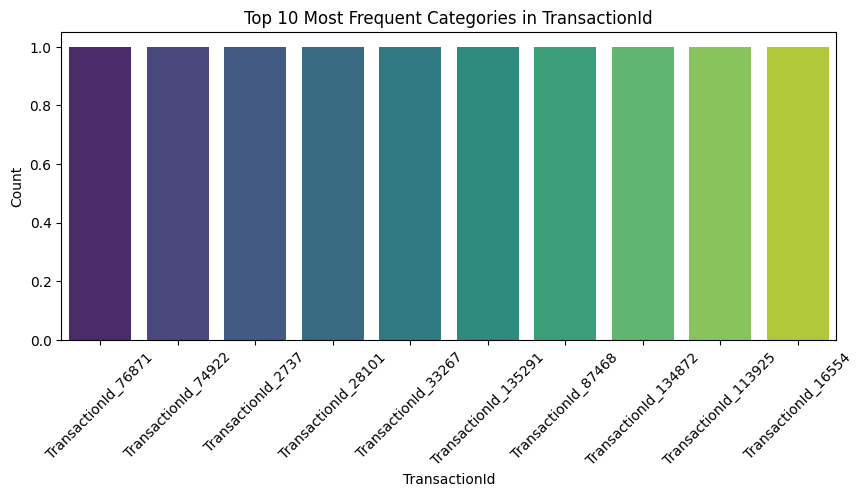

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


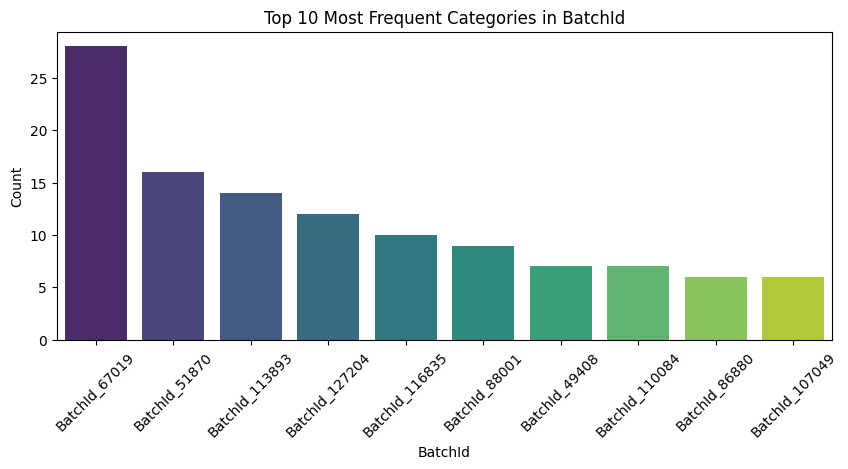

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


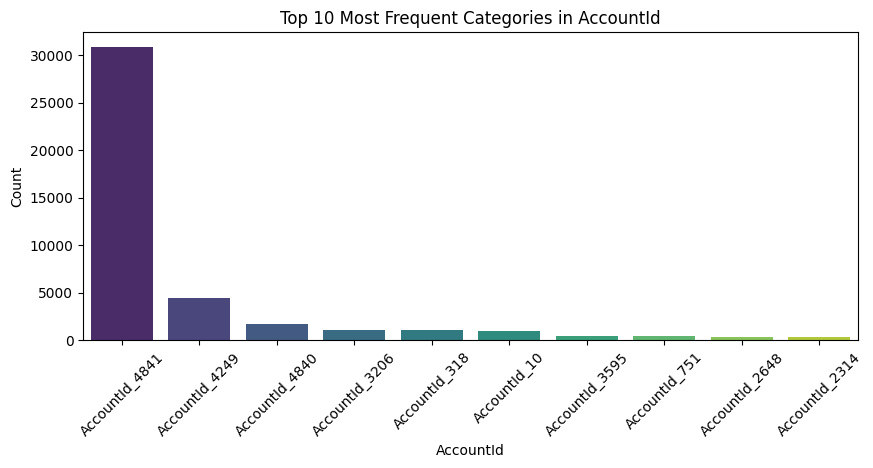

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


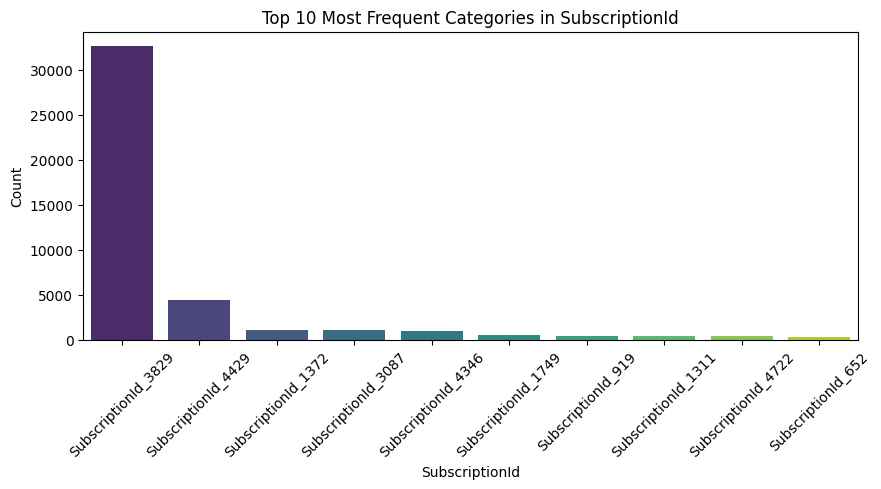

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


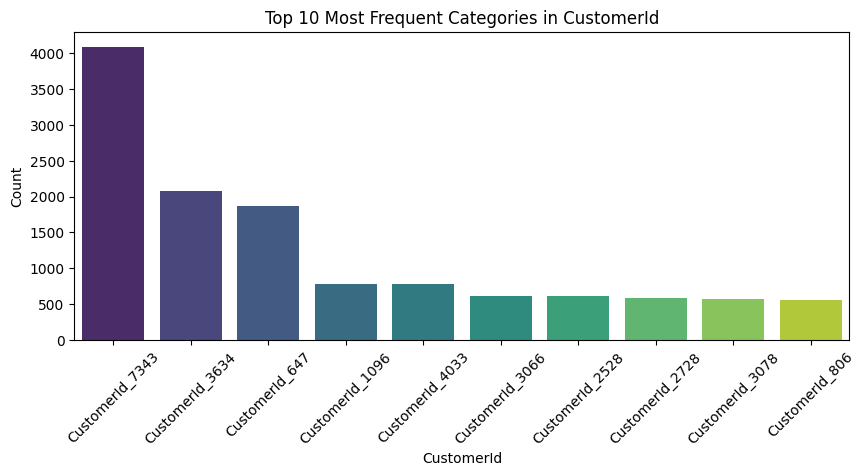

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


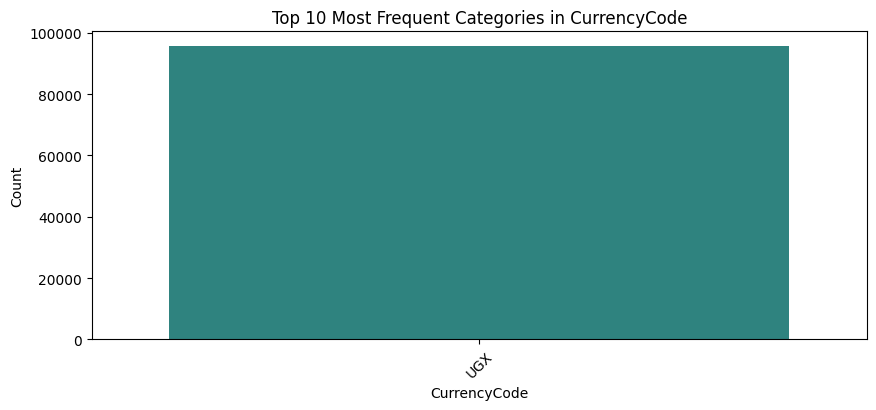

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


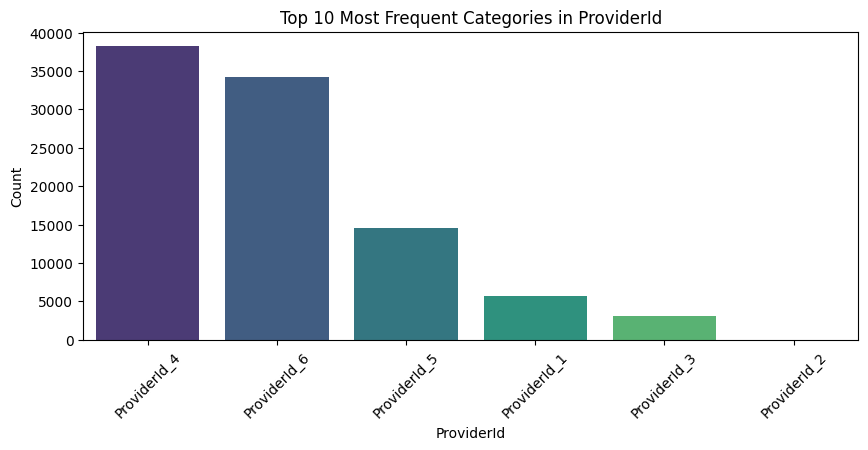

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


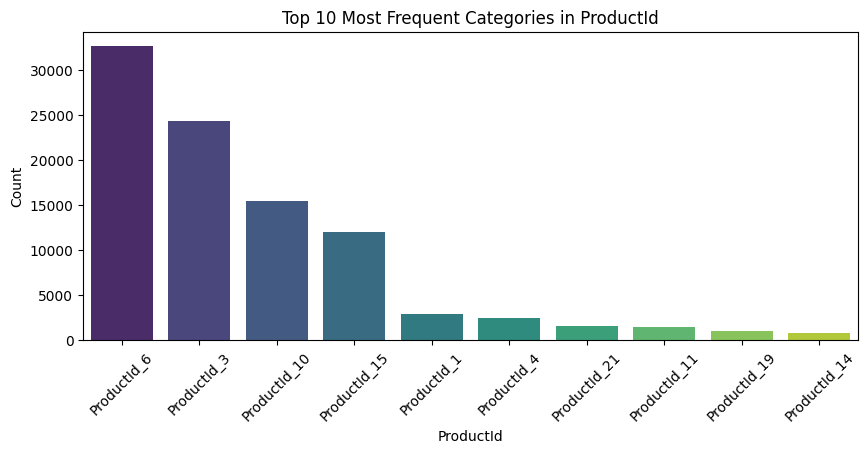

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


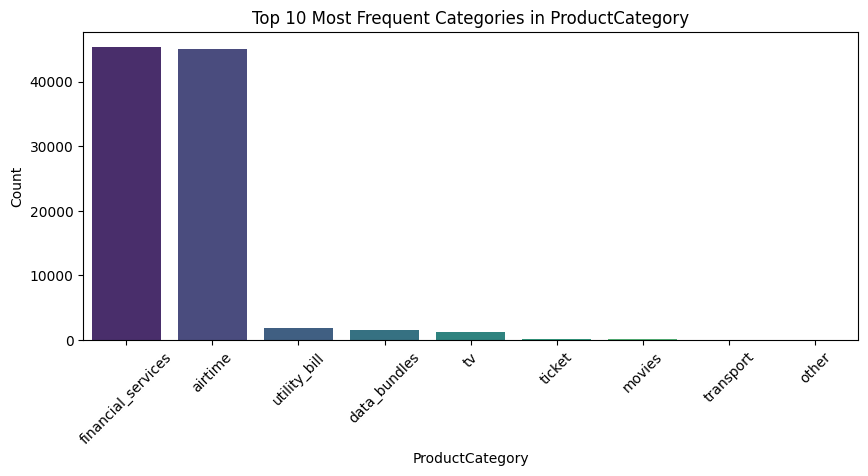

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


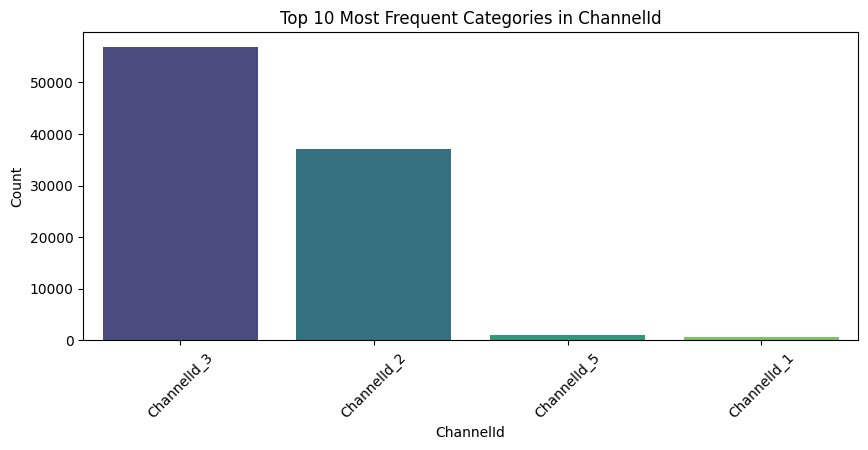

/tmp/ipykernel_10559/2986089240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


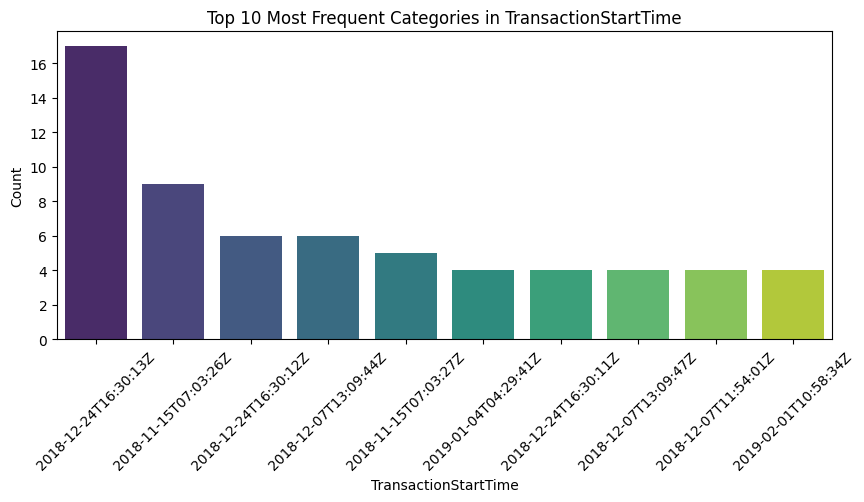

In [12]:
import seaborn as sns

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Plot bar charts for the top 10 most frequent categories in each categorical column
print("Distribution of Categorical Features explained using bar plots:")
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    value_counts = df[col].value_counts().head(10)
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Top 10 Most Frequent Categories in {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

## 6. Correlation Analysis

In this step, we will:
- Compute the correlation matrix for numerical features.
- Visualize the correlations using a heatmap to identify strong relationships between variables.

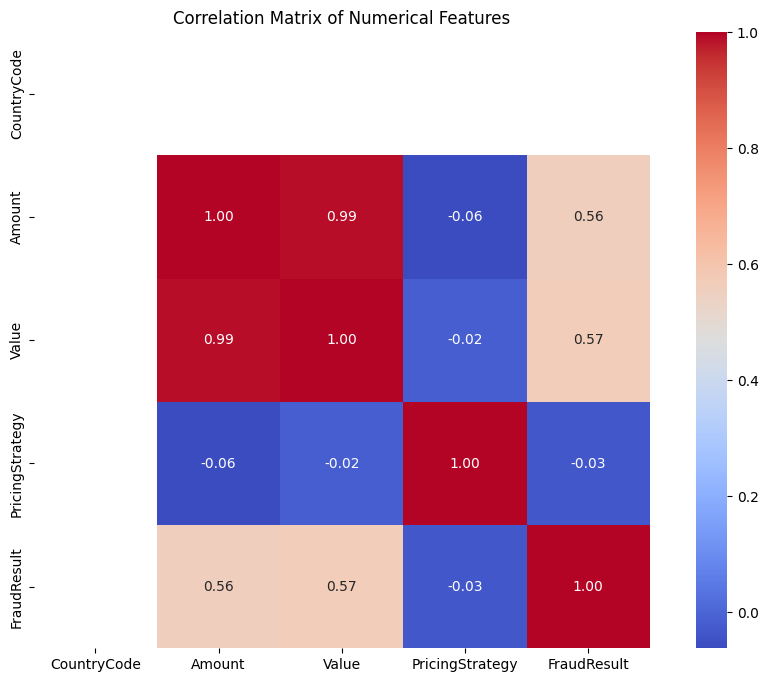

In [13]:
# Compute the correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 7. Identifying Missing Values

In this step, we will:
- Check for missing values in each column.
- Visualize the missing data to determine the extent and pattern of missingness.
- This will help us decide on appropriate imputation or removal strategies.

Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
Missing values heatmap using a heatmap:


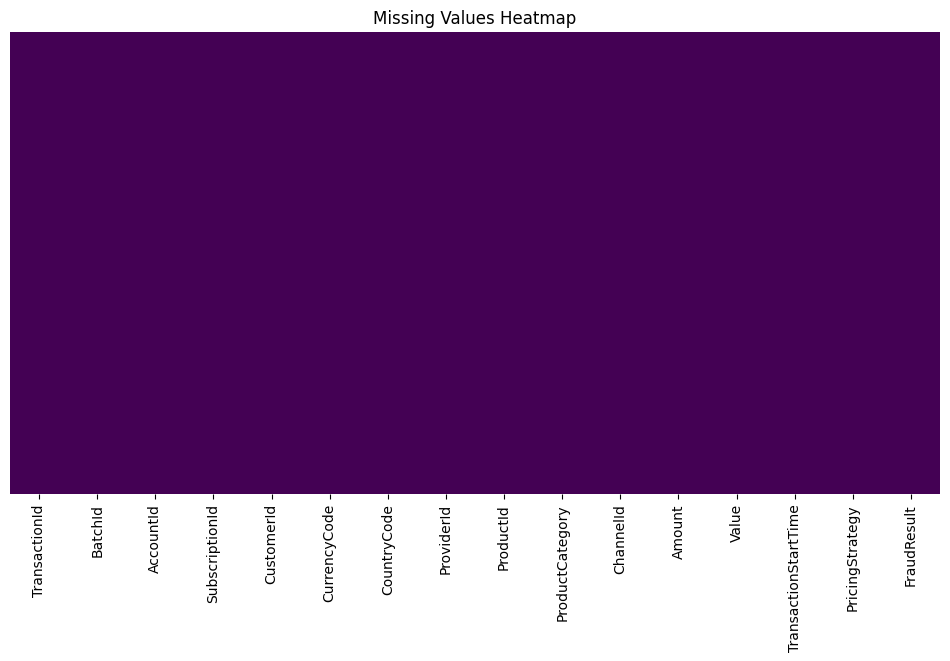

In [14]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Visualize missing values using a heatmap
print("Missing values heatmap using a heatmap:")
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 8. Outlier Detection

In this step, we will:
- Use box plots to identify outliers in key numerical features.
- Outliers can indicate data quality issues or important rare events.

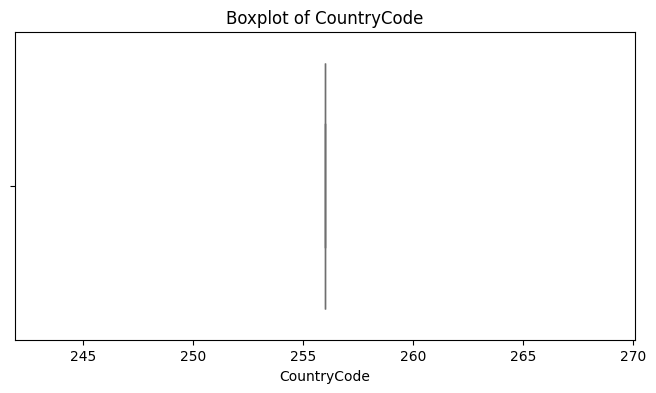

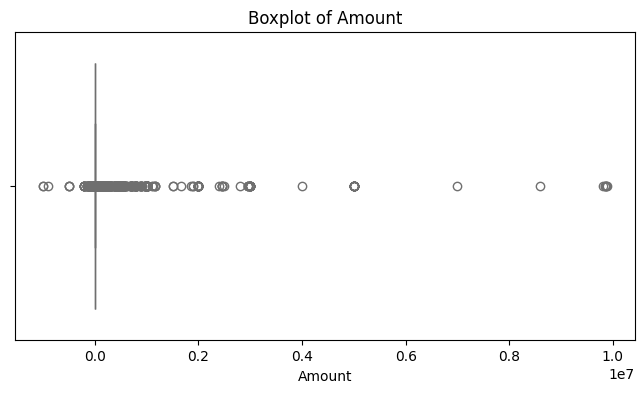

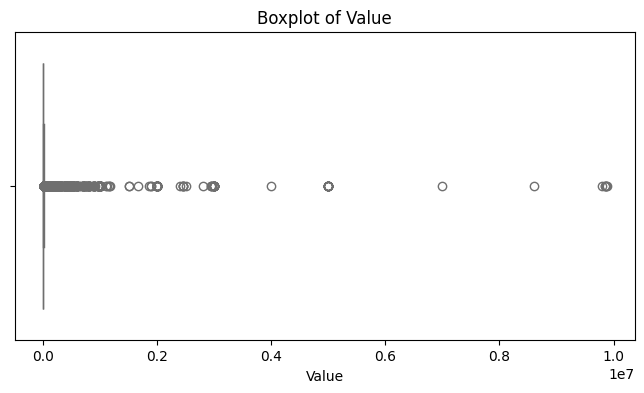

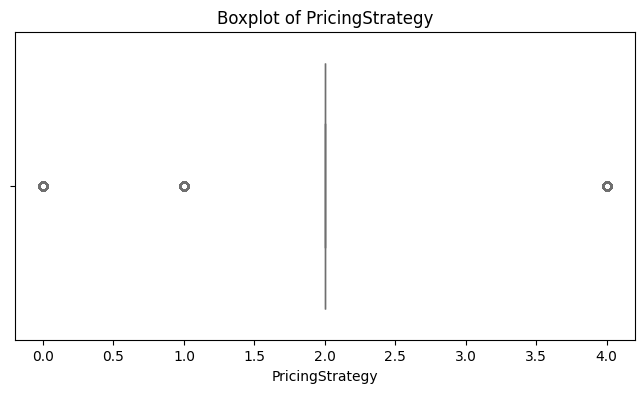

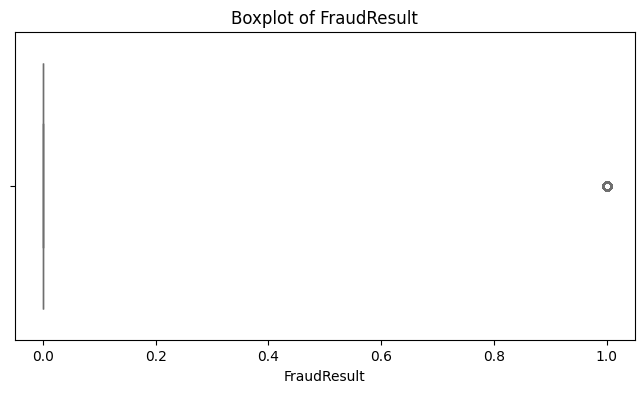

In [15]:
# Plot boxplots for each numerical feature to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

## 9. Initial Insights and Hypotheses

### Key Findings

1. **No Missing Values**
   - All columns are complete; there are no missing values in the dataset. This simplifies preprocessing as no imputation or row removal is needed.

2. **Correlation Analysis**
   - `Amount` and `Value` are extremely highly correlated (correlation ≈ 0.99), indicating they likely represent the same or very similar information.
   - `FraudResult` has a moderate positive correlation with both `Amount` and `Value` (≈ 0.56–0.57), suggesting larger transactions may be more likely to be flagged as fraud.
   - Other numerical features, such as `PricingStrategy` and `CountryCode`, show little to no correlation with the main transaction features.

3. **Categorical Feature Insights**
   - `CurrencyCode` has only one unique value (`UGX`), so it does not provide useful information for modeling and can be dropped.
   - Features like `ProviderId`, `ProductId`, `ProductCategory`, and `ChannelId` have a manageable number of unique values and are suitable for encoding.
   - High-cardinality columns (`AccountId`, `SubscriptionId`, `CustomerId`) indicate multiple transactions per customer/account and may be better used for aggregation (e.g., RFM features).

4. **Data Uniqueness**
   - `TransactionId` is unique for every row, as expected for a transaction log.
   - There are repeated values in customer/account-related columns, confirming that customers can have multiple transactions.

5. **No Major Data Quality Issues**
   - Data types and value ranges appear as expected.
   - No significant outliers or anomalies were detected in the summary statistics.

### Hypotheses

-  one of `Amount` or `Value` will be dropped due to redundancy.
- `CurrencyCode` will be dropped as it does not add information.
- Use categorical features with few unique values for encoding.
- Aggregate high-cardinality identifiers to create customer-level features (e.g., RFM).
